In [35]:
#Question 1 - Load all the csvs in " Players2020" folder into a single data frame

import pandas as pd
from pathlib import Path

#Path for the folder
folder_path = Path("/Users/liamhenshaw/Desktop/Liam Henshaw Drive/[02] Personal/[03] Tasks/Trading Analyst - Technical Interview/Players2020")

#Collect all .csv files
csv_files = list(folder_path.glob("*.csv"))

#Load and concatenate all CSVs into a single dataframe
all_players_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

#Show all players in single dataframe
all_players_df

,GameId,PlayerId,Team,Name,Position,Starter,Min,Fg Made,Fg Attempted,Three Made,...,Offensive Rebound,Defensive Rebound,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Plus Minus,Points
0,401161480,2580365,CLE,L. Nance Jr.,PF,1,28,5,10,0,...,2,5,7,1,2,0,3,3,-8,10
1,401161480,3893016,CLE,C. Osman,SF,1,38,6,15,4,...,2,5,7,7,0,0,0,2,-22,19
2,401161480,6585,CLE,A. Drummond,C,1,25,3,3,0,...,1,5,6,1,1,0,4,3,-25,6
3,401161480,4277811,CLE,C. Sexton,PG,1,33,5,15,3,...,0,2,2,9,1,0,4,3,-15,17
4,401161480,4396907,CLE,D. Garland,PG,1,33,6,11,2,...,0,0,0,5,2,0,2,1,-14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21845,401160963,6592,CLE,J. Henson,PF,0,14,2,3,0,...,1,4,5,2,0,3,2,2,-6,5
21846,401160963,2530923,CLE,A. McKinnie,SF,0,6,0,2,0,...,1,1,2,0,0,0,1,1,-10,1
21847,401160963,2489716,CLE,M. Dellavedova,PG,0,14,2,4,1,...,1,1,2,4,0,0,0,1,-14,5
21848,401160963,2528426,CLE,J. Clarkson,PG,0,21,3,11,2,...,1,0,1,2,0,0,2,1,-15,8


In [36]:
#Question 2 - Create a table with the average points per game for all the players together with the
# number of games that the player has played

#Get the most common team for each player, in case they have played for multiple teams
#This extra detail is helpful in the final table
player_teams = (
    all_players_df
    .groupby(['PlayerId', 'Name'])['Team']
    .agg(lambda x: x.mode().iloc[0])
    .reset_index()
)

#Calculate games played and average points
player_summary = (
    all_players_df
    .groupby(['PlayerId', 'Name'])
    .agg(
        Games_Played=('GameId', 'nunique'),
        Total_Points=('Points', 'sum')
    )
    .assign(Avg_Points_Per_Game=lambda df: round(df['Total_Points'] / df['Games_Played'], 2))
    .reset_index()
)

#Merge team info into the summary
player_summary = player_summary.merge(player_teams, on=['PlayerId', 'Name'])

#Reorder columns for a better table
player_summary = player_summary[['PlayerId', 'Name', 'Team', 'Games_Played', 'Total_Points', 'Avg_Points_Per_Game']]

#Sort by average points per game
player_summary = player_summary.sort_values(by='Avg_Points_Per_Game', ascending=False)

#Show the dataframe
player_summary

,PlayerId,Name,Team,Games_Played,Total_Points,Avg_Points_Per_Game
63,3992,J. Harden,HOU,67,2274,33.94
111,6580,B. Beal,WSH,57,1741,30.54
238,3032977,G. Antetokounmpo,MIL,63,1870,29.68
122,6606,D. Lillard,POR,64,1875,29.30
473,4277905,T. Young,ATL,62,1806,29.13
...,...,...,...,...,...,...
229,2995105,S. Kidd,UTAH,4,0,0.00
443,4066392,I. Roby,OKC,3,0,0.00
448,4066490,K. Antetokounmpo,LAL,4,0,0.00
466,4237239,W. Howard,HOU,2,0,0.00


In [37]:
#Question 3 - What was the highest scoring game of the season?
#I group by GameId and sum the points to find which game had the highest total score.

#Calculate total points per game using GameId
game_scores = (
    all_players_df
    .groupby('GameId')['Points']
    .sum()
    .reset_index()
    .rename(columns={'Points': 'Total_Points'})
)

#Find the GameId of the highest scoring game
highest_game_id = game_scores.loc[game_scores['Total_Points'].idxmax(), 'GameId']

#Filter the original df for that game
game_data = all_players_df[all_players_df['GameId'] == highest_game_id]

#Get the two teams involved from that game
teams_in_game = game_data['Team'].unique()

#Combine the points, GameId and tems into a summary
highest_scoring_game_summary = {
    'GameId': highest_game_id,
    'Total_Points': game_data['Points'].sum(),
    'Teams': list(teams_in_game)
}

#Display the game
print(highest_scoring_game_summary)

{'GameId': 401160703, 'Total_Points': 317, 'Teams': ['HOU', 'WSH']}


In [38]:
#Question 4 - Create a function that given a team returns a data.frame with the number of victories,
# loses, points per game, and opponent points per game

def get_team_summary(team_name, df=all_players_df):
    #Identify all games the team played in
    team_games = df[df['Team'] == team_name]['GameId'].unique()
    
    summary_rows = []
    
    for game_id in team_games:
        game_df = df[df['GameId'] == game_id]
        
        #Points by the team
        team_points = game_df[game_df['Team'] == team_name]['Points'].sum()
        
        #Points by the opponent
        opponent_points = game_df[game_df['Team'] != team_name]['Points'].sum()
        
        #Determine win/loss
        result = 'Win' if team_points > opponent_points else 'Loss'
        
        summary_rows.append({
            'GameId': game_id,
            'TeamPoints': team_points,
            'OpponentPoints': opponent_points,
            'Result': result
        })
    
    #Convert to dataframe
    results_df = pd.DataFrame(summary_rows)
    
    #Calculate overall stats
    total_games = len(results_df)
    wins = (results_df['Result'] == 'Win').sum()
    losses = (results_df['Result'] == 'Loss').sum()
    ppg = round(results_df['TeamPoints'].mean(), 2)
    oppg = round(results_df['OpponentPoints'].mean(), 2)
    
    return pd.DataFrame([{
        'Team': team_name,
        'Games': total_games,
        'Wins': wins,
        'Losses': losses,
        'Points_Per_Game': ppg,
        'Opponent_Points_Per_Game': oppg
    }])


In [39]:
#Using the get_team_summary function

get_team_summary('HOU')

,Team,Games,Wins,Losses,Points_Per_Game,Opponent_Points_Per_Game
0,HOU,69,44,25,118.51,114.55


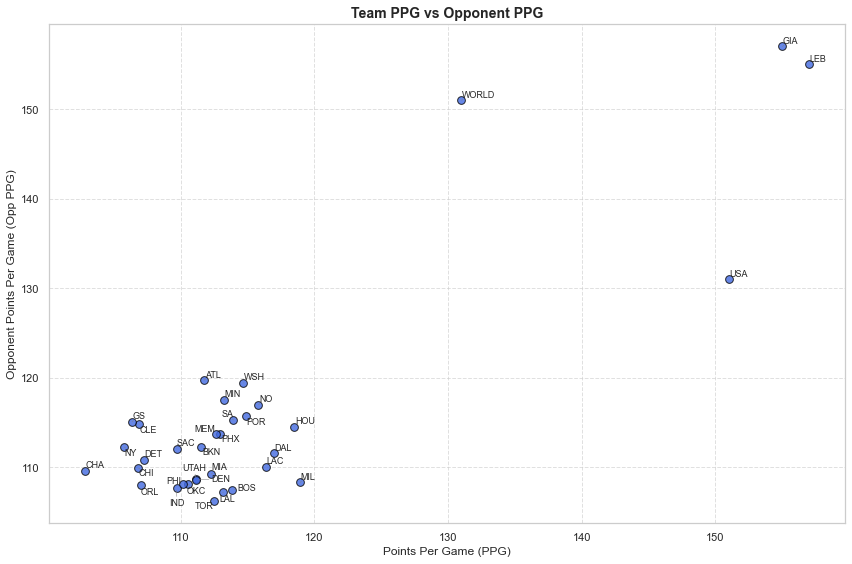

In [40]:
#Question 5 - Create a scatterplot for each team with its points per game against its opponent points
# per game. Label the points with the team name.

#List of unique team names
team_names = all_players_df['Team'].unique()

#Create summary for each team
team_stats = pd.concat([get_team_summary(team) for team in team_names], ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

#Set visual style
sns.set(style="whitegrid")

#Create figure
plt.figure(figsize=(12, 8))

#Scatter points
plt.scatter(
    team_stats['Points_Per_Game'],
    team_stats['Opponent_Points_Per_Game'],
    color='royalblue',
    s=60,
    edgecolor='black',
    alpha=0.8
)

#Add labels but adjust when names are too close 
texts = [
    plt.text(row['Points_Per_Game'], row['Opponent_Points_Per_Game'], row['Team'], fontsize=9)
    for _, row in team_stats.iterrows()
]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))

#Add axis labels and title
plt.xlabel('Points Per Game (PPG)', fontsize=12)
plt.ylabel('Opponent Points Per Game (Opp PPG)', fontsize=12)
plt.title('Team PPG vs Opponent PPG', fontsize=14, weight='bold')

#Format grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [41]:
#Question 6 - Recreate the table that can be found on
# ("https://www.espn.co.uk/nba/table/_/group/league") with only the
# columns for victories, loses, points per game, and opponent points per game

#Generate the summary table for all teams
team_names = all_players_df['Team'].unique()
team_stats = pd.concat([get_team_summary(team) for team in team_names], ignore_index=True)

#Select the columns needed for the table
espn_style_table = team_stats[[
    'Team', 'Wins', 'Losses', 'Points_Per_Game', 'Opponent_Points_Per_Game'
]].sort_values(by='Wins', ascending=False).reset_index(drop=True)

#Show the ESPN style table
espn_style_table

,Team,Wins,Losses,Points_Per_Game,Opponent_Points_Per_Game
0,MIL,55,15,118.93,108.30
1,LAL,50,19,113.16,107.22
2,TOR,50,19,112.49,106.28
3,BOS,47,23,113.87,107.51
4,LAC,47,23,116.37,110.03
5,DEN,46,24,111.19,108.64
6,HOU,44,25,118.51,114.55
7,MIA,43,27,112.30,109.24
8,UTAH,43,27,111.16,108.59
9,OKC,43,26,110.58,108.10


In [42]:
#Question 7 - Load the data in "Boxscores2020"

import pandas as pd
from pathlib import Path

#Path for the folder
boxscores_path = Path("/Users/liamhenshaw/Desktop/Liam Henshaw Drive/[02] Personal/[03] Tasks/Trading Analyst - Technical Interview/Boxscores2020")

#Get all CSV files in the folder
boxscore_files = list(boxscores_path.glob("*.csv"))

#Load and concatenate all CSVs into a single dataframe
boxscores_df = pd.concat([pd.read_csv(file) for file in boxscore_files], ignore_index=True)

#Print the dataframe
boxscores_df

,GameId,Date,AwayTeam,Away Ov Record,Away Record away,Away 1Q Score,Away 2Q Score,Away 3Q Score,Away 4Q Score,Away Final Score,HomeTeam,Home Ov Record,Home Record home,Home 1Q Score,Home 2Q Score,Home 3Q Score,Home 4Q Score,Home Final Score
0,401161268,20200118,LAC,30-13,11-9 Away,33,39,30,31,133,NO,16-27,8-13 Home,35,45,30,20,130
1,401161532,20200229,IND,36-24,15-14 Away,30,26,30,27,113,CLE,17-43,9-23 Home,31,27,28,18,104
2,401161254,20200115,DAL,26-15,14-5 Away,35,36,37,19,127,SAC,15-26,8-13 Home,31,36,26,30,123
3,401161240,20200114,PHX,16-24,7-10 Away,25,26,32,27,110,ATL,9-32,5-14 Home,28,28,28,39,123
4,401161526,20200228,DET,20-41,9-21 Away,29,23,32,29,113,PHX,24-36,11-20 Home,24,29,26,32,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,401161259,20200116,DEN,29-12,12-7 Away,19,26,28,40,134,GS,9-34,6-15 Home,34,28,23,28,131
1030,401161503,20200225,NO,25-33,14-16 Away,26,32,28,23,109,LAL,44-12,21-7 Home,30,34,24,30,118
1031,401161265,20200117,MIA,29-12,11-11 Away,40,21,31,23,115,OKC,23-19,13-9 Home,26,21,31,30,108
1032,401161271,20200118,DET,16-27,8-14 Away,36,35,32,33,136,ATL,10-33,5-15 Home,29,26,21,27,103


In [43]:
#Question 8 - Enrich the players data frame created in point 1 adding a column
# called "isHomeTeam" with a value of 1 if the player belongs to the home team and a
# value of 0 otherwise.

#Create mapping using GameId and HomeTeam and keep uniques
home_team_map = boxscores_df[['GameId', 'HomeTeam']].drop_duplicates()

#Merge this into the players dataframe
all_players_df = all_players_df.merge(home_team_map, on='GameId', how='left')

#Create isHomeTeam column
all_players_df['isHomeTeam'] = (all_players_df['Team'] == all_players_df['HomeTeam']).astype(int)

#Show the dataframe
all_players_df

,GameId,PlayerId,Team,Name,Position,Starter,Min,Fg Made,Fg Attempted,Three Made,...,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Plus Minus,Points,HomeTeam,isHomeTeam
0,401161480,2580365,CLE,L. Nance Jr.,PF,1,28,5,10,0,...,7,1,2,0,3,3,-8,10,MIA,0
1,401161480,3893016,CLE,C. Osman,SF,1,38,6,15,4,...,7,7,0,0,0,2,-22,19,MIA,0
2,401161480,6585,CLE,A. Drummond,C,1,25,3,3,0,...,6,1,1,0,4,3,-25,6,MIA,0
3,401161480,4277811,CLE,C. Sexton,PG,1,33,5,15,3,...,2,9,1,0,4,3,-15,17,MIA,0
4,401161480,4396907,CLE,D. Garland,PG,1,33,6,11,2,...,0,5,2,0,2,1,-14,14,MIA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21845,401160963,6592,CLE,J. Henson,PF,0,14,2,3,0,...,5,2,0,3,2,2,-6,5,CLE,1
21846,401160963,2530923,CLE,A. McKinnie,SF,0,6,0,2,0,...,2,0,0,0,1,1,-10,1,CLE,1
21847,401160963,2489716,CLE,M. Dellavedova,PG,0,14,2,4,1,...,2,4,0,0,0,1,-14,5,CLE,1
21848,401160963,2528426,CLE,J. Clarkson,PG,0,21,3,11,2,...,1,2,0,0,2,1,-15,8,CLE,1


In [44]:
#Question 9 - Extend the table in Q4 with two columns for the Home and Away record for the team (the
# number of victories/loses for a team when it plays at home and away respectively)

def get_team_summary_extended(team_name, df=all_players_df):
    #Filter to games where the team played
    team_games = df[df['Team'] == team_name]['GameId'].unique()

    summary_rows = []

    for game_id in team_games:
        game_df = df[df['GameId'] == game_id]
        team_df = game_df[game_df['Team'] == team_name]
        opponent_df = game_df[game_df['Team'] != team_name]

        #Team and opponent points
        team_points = team_df['Points'].sum()
        opponent_points = opponent_df['Points'].sum()

        #Determine win/loss
        result = 'Win' if team_points > opponent_points else 'Loss'

        #Is this a home game?
        is_home = team_df['isHomeTeam'].iloc[0]

        summary_rows.append({
            'GameId': game_id,
            'Result': result,
            'isHomeTeam': is_home,
            'TeamPoints': team_points,
            'OpponentPoints': opponent_points
        })

    #Create a summary dataframe for the team's games
    results_df = pd.DataFrame(summary_rows)

    #Calculate totals
    total_games = len(results_df)
    wins = (results_df['Result'] == 'Win').sum()
    losses = (results_df['Result'] == 'Loss').sum()
    ppg = round(results_df['TeamPoints'].mean(), 2)
    oppg = round(results_df['OpponentPoints'].mean(), 2)

    #Home/Away splits
    home_df = results_df[results_df['isHomeTeam'] == 1]
    away_df = results_df[results_df['isHomeTeam'] == 0]

    home_wins = (home_df['Result'] == 'Win').sum()
    home_losses = (home_df['Result'] == 'Loss').sum()
    away_wins = (away_df['Result'] == 'Win').sum()
    away_losses = (away_df['Result'] == 'Loss').sum()

    return pd.DataFrame([{
        'Team': team_name,
        'Games': total_games,
        'Wins': wins,
        'Losses': losses,
        'Points_Per_Game': ppg,
        'Opponent_Points_Per_Game': oppg,
        'Home_Wins': home_wins,
        'Home_Losses': home_losses,
        'Away_Wins': away_wins,
        'Away_Losses': away_losses
    }])


In [45]:
#Using the get_team_summary_extended function

get_team_summary_extended('LAL')

,Team,Games,Wins,Losses,Points_Per_Game,Opponent_Points_Per_Game,Home_Wins,Home_Losses,Away_Wins,Away_Losses
0,LAL,69,50,19,113.16,107.22,24,9,26,10
